<a href="https://colab.research.google.com/github/suyeonlee01/insight-12th/blob/main/Solar-Fullstack-LLM-101/98_all_edu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/98_all_edu.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Upstage Solar Full Stack LLM 101
## Code to Understand!
![Overview](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/overview.png?raw=1)


### Table of Contents
* <b> Session 1. Hello Solar </b> : Obtain an Upstage API Key and use the upstage chat model. <br>
    - 1-1 Interacting with the Solar-1-mini-chat Model
    - 1-2 Using Few-Shot Examples in Chat Completions


- <b> Session 2. Building LLM Applications with LangChain</b> :  Learn how to easily implement LLM chains using LangChain and understand the features of LLMs.<br>
    - 2-1 Prompt Engineering
    - 2-2 Hallucinations
    - 2-3 Groundedness Check with LangChain and Upstage


- <b> Session 3. What is RAG? </b>:  Understand the concept of RAG, load documents, and implement a RAG system.<br>
    - 3-1 Layout Analysis
    - 3-2 Retrieval Augmented Generation (RAG) for Question Answering
    - 3-3 RAG Limitations <br>


- <b> Session 4. Efficient Text Splitting and Indexing with LangChain </b>:  Efficiently build a RAG system by loading external documents, splitting them into smaller chunks, using embedding APIs to store them in a vectorspace, and retrieving them.<br>

- <b> Session 5. Gradio </b>: Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

In [ ]:
! pip3 install -qU guardrails-ai openai langchain_community langchain_experimental langchain-upstage sentence-transformers langchainhub langchain-chroma langchain matplotlib python-dotenv tavily-python ragas faiss-cpu tokenizers getpass4
! pip3 install -q arize-phoenix[evals]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.1/387.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## [Session 1] HELLO SOLAR

  
<b> Introduction to Solar Framework </b>: Learn the basics of setting up the Solar LLM framework and running a simple "Hello, World!" example to understand its core functionality.  

#### UPSTAGE_API_KEY
To obtain your Upstage API key, follow these steps:

1. Visit the Upstage AI console at <https://console.upstage.ai>.
2. Sign up for an account if you don't already have one.
3. Log in to your account.
4. Navigate to the API key section.
5. Generate your API key.
6. Copy the key and save it securely.

![Console](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/console.upstage.ai.jpg?raw=1)

In [ ]:
%load_ext dotenv
%dotenv
# UPSTAGE_API_KEY from https://console.upstage.ai/

cannot find .env file


In [ ]:
import os
import getpass
import warnings

warnings.filterwarnings("ignore")

## 여기까지는 보안 관련 코드인 것 같습니다.

In [ ]:
# @title set API key
import os
import getpass
from pprint import pprint
import warnings

warnings.filterwarnings("ignore")

from IPython import get_ipython

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata
    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

if "UPSTAGE_API_KEY" not in os.environ:
    os.environ["UPSTAGE_API_KEY"] = getpass.getpass("Enter your Upstage API key: ")


## Google Colab과 로컬 환경 모두에서 Upstage API 키를 설정하는 방법을 제공합니다.

####  1-1 Interacting with the Solar-1-mini-chat Model

This Python code demonstrates how to use the OpenAI API to interact with the Solar-1-mini-chat model provided by Upstage AI.

##### Steps

1. Import necessary libraries: `os`, `openai`, and `pprint`.
2. Set up the OpenAI client with the API key and base URL.
3. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including the system message and user message.
4. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [ ]:
import os
from openai import OpenAI
from pprint import pprint

client = OpenAI(
    api_key=os.environ["UPSTAGE_API_KEY"], base_url="https://api.upstage.ai/v1/solar"
)
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='376fc318-556f-4ea4-bd2d-e6f1546f7712', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="Oh, Korea! That's a beautiful place with a rich history and culture. I haven't been there yet, but I'd love to visit someday. The food is supposed to be amazing, and I'm curious about trying Kimchi, which is a traditional fermented vegetable dish. I'd also love to see the Demilitarized Zone (DMZ) and learn more about the history of the Korean War. And, of course, I'd love to meet new friends and share stories with them.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730507327, model='solar-mini-240612', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=113, prompt_tokens=26, total_tokens=139, completion_tokens_details=None, prompt_tokens_details=None))
Message only:
("Oh, Korea! That's a beautiful place with a rich history 

## Upstage의 Solar 모델을 활용하여 AI와 대화를 나누는 예시입니다.

#### 1-2 Using Few-Shot Examples in Chat Completions

This Python code demonstrates how to use few-shot examples in the OpenAI Chat Completions API to provide context and guide the model's responses.

##### Steps

1. Set up the OpenAI client with the API key and base URL.
2. Create a chat completion request using `client.chat.completions.create()`.
   - Specify the model: "solar-1-mini-chat".
   - Provide a list of messages, including:
     - System message: Defines the assistant's role.
     - Few-shot examples: Provide context and desired behavior.
     - User input: The actual user query.
3. Handle the model's response:
   - Print the entire response using `pprint()`.
   - Print the content of the assistant's message using `response.choices[0].message.content`.

In [ ]:
# few shots: examples or history
chat_result = client.chat.completions.create(
    model="solar-1-mini-chat",
    messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        # examples
        {"role": "user", "content": "What is the capital of France?"},
        {
            "role": "assistant",
            "content": "I know of it. It's Paris!!",
        },
        # user input
        {"role": "user", "content": "What about Korea?"},
    ],
)
pprint(chat_result)
print("Message only:")
pprint(chat_result.choices[0].message.content)

ChatCompletion(id='46379a7c-b3ee-48a9-962d-3b1be1456bec', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content="I'm not sure, but I'll find out.", refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None))], created=1730507329, model='solar-mini-240612', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=14, prompt_tokens=55, total_tokens=69, completion_tokens_details=None, prompt_tokens_details=None))
Message only:
"I'm not sure, but I'll find out."


## Few-Shot Learning 관련 설명:
Few-shot learning은 소량의 학습 데이터만으로도 AI 모델이 새로운 작업을 수행할 수 있도록 하는 머신러닝 기법입니다. 이 기술은 특히 데이터가 제한된 상황에서 유용하며, 적은 양의 예시로도 모델이 일반화 능력을 발휘할 수 있도록 훈련됩니다.
Few-shot learning의 핵심은 모델이 몇 개의 예시만 보고도 새로운 데이터에 대해 잘 예측할 수 있도록 하는 것입니다.

## [Session 2] Building LLM Applications with LangChain

This Python code demonstrates how to use the LangChain library to build applications with Large Language Models (LLMs). It covers the basic steps of defining an LLM, creating a chat prompt, defining a chain, and invoking the chain.

#### Steps

1. Define your favorite LLM:
   - Import the `ChatUpstage` class from `langchain_upstage`.
   - Create an instance of `ChatUpstage` and assign it to the variable `llm`.

2. Define a chat prompt:
   - Import the `ChatPromptTemplate` class from `langchain_core.prompts`.
   - Create a `ChatPromptTemplate` instance using the `from_messages()` method.
   - Provide a list of messages, including system messages, example conversations, and user input.

3. Define a chain:
   - Import the `StrOutputParser` class from `langchain_core.output_parsers`.
   - Create a chain by combining the `rag_with_history_prompt`, `llm`, and `StrOutputParser()` using the pipe (`|`) operator.

4. Invoke the chain:
   - Call the `invoke()` method on the `chain` object, passing an empty dictionary (`{}`) as the input.
   - Print the response obtained from the chain.

LangChain 라이브러리를 사용하여 대형 언어 모델(LLM) 기반 애플리케이션을 구축하는 방법을 보여줍니다. 이 코드는 LLM을 정의하고, 대화 프롬프트를 생성하며, 체인을 정의하고, 체인을 호출하는 기본 단계를 다룹니다.

선호하는 LLM 정의:
langchain_upstage에서 ChatUpstage 클래스를 가져옵니다.
ChatUpstage의 인스턴스를 생성하고 이를 변수 llm에 할당합니다.

대화 프롬프트 정의:
langchain_core.prompts에서 ChatPromptTemplate 클래스를 가져옵니다.
from_messages() 메서드를 사용하여 ChatPromptTemplate 인스턴스를 생성합니다. 시스템 메시지, 예시 대화, 사용자 입력 등의 메시지 목록을 제공합니다.

체인 정의:
langchain_core.output_parsers에서 StrOutputParser 클래스를 가져옵니다.
rag_with_history_prompt, llm, 그리고 StrOutputParser()를 파이프(|) 연산자를 사용하여 결합하여 체인을 생성합니다.

체인 호출:
체인 객체의 invoke() 메서드를 호출하여, 빈 딕셔너리({})를 입력으로 전달합니다.
체인에서 얻은 응답을 출력합니다.

## LangChain은 대규모 언어 모델(LLM)을 활용한 애플리케이션을 쉽게 구축할 수 있도록 도와주는 오픈 소스 프레임워크입니다. LLM은 GPT-4와 같은 사전 훈련된 AI 모델로, 자연어 처리(NLP) 작업을 수행하는 데 사용됩니다.

In [ ]:
# Quick hello world
from langchain_upstage import ChatUpstage

llm = ChatUpstage()
llm.invoke("Hello, how are you?")

AIMessage(content="Hello! I'm just a computer program, so I don't have feelings or emotions. I'm here to assist you with any questions or tasks you have. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 16, 'total_tokens': 58, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'solar-mini-240612', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-b3bf598d-7cc8-4ade-8016-5f82a64acd47-0', usage_metadata={'input_tokens': 16, 'output_tokens': 42, 'total_tokens': 58, 'input_token_details': {}, 'output_token_details': {}})

## LangChain을 사용하여 대화형 AI 시스템을 구축하는 과정

ChatPromptTemplate을 사용하여 대화 히스토리를 포함한 프롬프트를 정의합니다. 이 프롬프트는 시스템 메시지, 이전 대화 내용, 그리고 현재 질문을 포함하고 있어 모델이 컨텍스트를 이해하고 적절한 응답을 생성

대화 히스토리를 포함한 RAG(Retrieval-Augmented Generation) 시스템의 기본 구조를 보여줍니다. 이 시스템은 이전 대화 내용을 고려하여 한국의 수도에 대한 질문에 답변

체인 (Chain)
체인은 여러 작업이나 프로세스를 순차적으로 연결한 것을 의미합니다5.
LangChain에서 체인은 여러 단계의 작업을 순서대로 실행하는 프로세스를 말합니다.
각 단계는 이전 단계의 출력을 입력으로 받아 처리합니다.
복잡한 작업을 작은 단계들로 나누어 처리할 수 있게 해줍니다.
쉽게 말해, 체인은 여러 작업을 연결해서 하나의 큰 작업을 수행하는 방식이라고 볼 수 있습니다.

쿼리 (Query)
쿼리는 데이터베이스에 정보를 요청하는 것을 의미합니다26.
데이터베이스에서 원하는 정보를 검색하기 위한 요청입니다.
예를 들어, "프랑스의 수도는 무엇인가요?"라는 질문이 하나의 쿼리가 될 수 있습니다.
데이터베이스는 이 쿼리를 처리하여 관련된 정보(이 경우 "파리")를 반환합니다.
간단히 말해, 쿼리는 데이터베이스에 무언가를 물어보는 것과 같습니다.

파싱 (Parsing)
파싱은 데이터를 분석하고 의미 있는 형태로 변환하는 과정입니다1.
구조화되지 않은 데이터(예: 문자열)를 분석하여 구조화된 형태로 변환합니다.
예를 들어, "12 * 5 - 5 / 3"이라는 수식을 파싱하면 각 숫자와 연산자를 구분하여 처리할 수 있는 형태로 만듭니다.
프로그래밍에서는 코드를 읽고 해석하는 과정도 파싱이라고 할 수 있습니다.

In [ ]:
# langchain, 1. llm define, 2. prompt define, 3. chain, 4. chain.invoke

# 1. define your favorate llm, solar
from langchain_upstage import ChatUpstage

llm = ChatUpstage()

# 2. define chat prompt
from langchain_core.prompts import ChatPromptTemplate

rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about Korea?"),
    ]
)

# 3. define chain
from langchain_core.output_parsers import StrOutputParser

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke the chain
c_result = chain.invoke({})
print(c_result)

Ah, Korea is a bit tricky. There are two Koreas, North Korea and South Korea. The capital of South Korea is Seoul, while the capital of North Korea is Pyongyang.


### 2-1 Prompt Engineering

#### Parameterized Prompt Templates in LangChain

##### Overview

- Prompt templates allow for reusable and modular prompts
- They improve maintainability compared to using raw prompt strings
- {country} value can be set from outside

Prompt Engineering
Prompt Engineering은 언어 모델에 최적의 입력을 제공하여 원하는 출력을 얻는 기술입니다.
이는 다음과 같은 요소들을 포함합니다:

명확하고 구체적인 지시사항 제공
적절한 컨텍스트 설정
예시 포함 (few-shot learning)
출력 형식 지정
제약 조건 설정
효과적인 프롬프트 엔지니어링을 통해 모델의 성능을 크게 향상시킬 수 있습니다.

LangChain의 매개변수화된 프롬프트 템플릿
LangChain은 재사용 가능하고 모듈화된 프롬프트를 만들기 위해 PromptTemplate을 제공합니다. 주요 특징은 다음과 같습니다:
재사용성: 프롬프트 구조를 한 번 정의하고 여러 곳에서 재사용할 수 있습니다.
모듈성: 프롬프트 로직을 비즈니스 로직과 분리하여 코드의 가독성을 높입니다.
동적 생성: 런타임에 사용자 입력이나 다른 요소에 따라 프롬프트를 동적으로 생성할 수 있습니다.
유지보수성: 프롬프트 구조를 변경할 때 한 곳만 수정하면 되므로 유지보수가 용이합니다.

In [ ]:
# parameterized prompt template
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        ("human", "What is the capital of France?"),
        ("ai", "I know of it. It's Paris!!"),
        ("human", "What about {country}?"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser()

# 4. invoke chain with param
print(chain.invoke({"country": "Korea"}))
print("---")
print(chain.invoke({"country": "Japan"}))

Ah, Korea! You see, Korea is divided into two countries: North Korea and South Korea. The capital of South Korea, which is the one most people think of when they hear "Korea," is Seoul. It's a bustling city with a rich history and a lot of modern technology. North Korea's capital is Pyongyang, but information about it is harder to come by.
---
Oh, I'm not sure about Japan. Let me think... It's Tokyo, right?


대화 히스토리와 함께 {country} 매개변수를 포함합니다. 이를 통해 다양한 국가에 대해 동일한 질문

chain.invoke() 메서드를 사용하여 체인을 실행합니다. 매개변수로 {"country": "Korea"}와 {"country": "Japan"}을 전달하여 각각 한국과 일본의 수도에 대해 질문합니다.

#### Leveraging Message History in LangChain Prompts

- LangChain provides powerful tools for managing conversation history
- `MessagesPlaceholder` allows for dynamic inclusion of message history
- `HumanMessage` and `AIMessage` classes represent individual messages
- Combining message history with user input enables context-aware responses

Leveraging Message History in LangChain Prompts는 LangChain에서 대화의 문맥을 유지하고 연속적인 응답을 생성하는 기능입니다. LangChain은 이전 메시지와 사용자의 입력을 결합하여 문맥을 반영한 응답을 생성할 수 있도록 여러 도구를 제공합니다.

MessagesPlaceholder:
MessagesPlaceholder는 대화 기록을 동적으로 포함할 수 있게 해주는 요소입니다. 이를 통해, 대화의 흐름을 반영하여 더 자연스럽고 문맥에 맞는 응답을 생성할 수 있습니다.
MessagesPlaceholder는 프롬프트 템플릿에 사용되어, 이전 대화 내용이 자동으로 입력되고 새 메시지를 추가할 때마다 업데이트됩니다.
HumanMessage와 AIMessage:

HumanMessage: 사용자가 입력한 메시지를 나타내는 클래스입니다. 사용자와의 대화에서 입력된 텍스트는 HumanMessage로 표현됩니다.
AIMessage: AI 모델이 생성한 응답을 나타내는 클래스입니다. 모델이 제공한 답변을 AIMessage로 기록합니다.
이러한 클래스를 사용하면 대화 내 메시지의 출처를 명확히 구분할 수 있어, 후속 질문에 대해 문맥을 더 정확하게 파악할 수 있습니다.
문맥을 반영한 응답 생성:

MessagesPlaceholder를 포함한 메시지 히스토리를 사용하여, 사용자가 후속 질문을 했을 때 이전 대화 내용을 참조하여 답변을 생성합니다.
예를 들어, LangChain에서 이전 대화의 흐름을 반영해 사용자가 구체적인 맥락 없이 "그게 언제였지?"와 같은 질문을 할 경우, 히스토리를 통해 더 정확하게 대답할 수 있습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = [
    HumanMessage("What is the capital of France?"),
    AIMessage("It's Paris!!"),
]

chain = rag_with_history_prompt | llm | StrOutputParser()
chain_result = chain.invoke({"history": history, "input": "What about Korea?"})
print(chain_result)

Oh, for Korea, it's Seoul!


HumanMessage는 사용자의 질문을 나타내고, AIMessage는 AI의 응답을 나타냅니다.

chain.invoke() 메서드를 호출하여 체인을 실행합니다.
매개변수로 {"history": history, "input": "What about Korea?"}를 전달합니다. 여기서 history는 이전 대화 내용을 포함하고, input은 새로운 질문(한국의 수도에 대한 질문)을 나타냅니다.
결과는 chain_result에 저장되고, 이를 출력합니다.

#### Chain of Thought Prompting

![CoT](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/cot.webp?raw=1)

from https://arxiv.org/abs/2201.11903

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
Q: The cafeteria had 23 apples.
If they used 20 to make lunch and bought 6 more,
how many apples do they have?

A: the answer is
"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'The cafeteria started with 23 apples. They used 20 apples for lunch, so they had 23 - 20 = 3 apples left. Then they bought 6 more apples, so they had 3 + 6 = 9 apples.\n\nThe final answer is:\n\\boxed{9}'

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template(
    """
Q: Roger has 5 tennis balls. He buys 2 more cans of tennis balls. Each can has 3 tennis balls. How many tennis balls does he have now?

A: Roger started with 5 balls. 2 cans of 3 tennis balls
each is 6 tennis balls. 5 + 6 = 11. The answer is 11.

Q: The cafeteria had 23 apples. If they used 20 to make lunch and bought 6 more, how many apples do they have?"""
)
chain = prompt_template | llm | StrOutputParser()
chain.invoke({})

'The cafeteria started with 23 apples. They used 20, so they had 3 left. Then they bought 6 more, so they had 9. The answer is 9.'

#### Learn more advanced techniques by reading blog posts on Prompt Engineering!


1. [[Prompt Engineering - Part 1] Maximizing the Use of LLM with Prompt Design](https://www.upstage.ai/feed/insight/prompt-engineering-guide-maximizing-the-use-of-llm-with-prompt-design)
2. [[Prompt Engineering - Part 2] The Essence of Prompt Engineering: A Comprehensive Guide to Maximizing LLM Usage](https://www.upstage.ai/feed/insight/prompt-engineering-guide-to-maximizing-llm-usage)


## prompt engineering 입력 방식

### 2-2 Hallucinations

<b> Understanding Model Hallucinations </b> : Discover how to identify, understand, and mitigate hallucinations to ensure accurate and reliable model outputs.

![Hallucination](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/hallucination.png?raw=1)

In [ ]:
# Cannot say "I don't know" :-)
# Because it is trained to complete the sentence and try to answer the question
llm.invoke("What is Upstage DUS technique?")

AIMessage(content='The Upstage DUS (Dynamic User-centered System for Theatre) technique is a methodology developed by the Upstage Theatre Company to create interactive and immersive theatrical experiences. It combines elements of game design, user experience design, and storytelling to engage audience members in a dynamic and collaborative way.\n\nThe DUS system is designed to allow audience members to influence the course of the story through their choices and actions. This is achieved through a combination of technology, such as sensors and motion-capture systems, and traditional theatrical techniques, such as live actors and set design.\n\nThe Upstage DUS technique is used to create an environment where the audience is actively involved in the story, rather than being passive observers. This creates a more engaging and memorable experience for the audience, as they feel more connected to the characters and the story.\n\nOverall, the Upstage DUS technique is a powerful tool for creat

## 환각이다...

#### Next Token Prediction
They are designed to generate the next words. It's also very difficult to know what we don't know.

![image](https://jalammar.github.io/images/xlnet/gpt-2-autoregression-2.gif)

Image from https://jalammar.github.io/illustrated-gpt2/

Next Token Prediction은 언어 모델이 입력에 따라 가장 가능성이 높은 다음 단어나 토큰을 예측하여 문장을 생성하는 방식입니다. 하지만 모르는 정보를 모르는 채로 자신감 있게 예측하는 한계가 있으며, 이를 개선하기 위해 추가적인 사실 검증이나 프롬프트 최적화가 필요할 수 있습니다.

### How Can We Mitigate Hallucinations?

### 2-3 Groundedness Check with LangChain and Upstage
![Groundedness](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/gc.png?raw=1)

[Groundedness Check](https://developers.upstage.ai/docs/apis/groundedness-check)

#### High-Level Overview

The provided code demonstrates how to perform a groundedness check using the LangChain library and the Upstage model. The groundedness check is a process of verifying whether the generated response is grounded in the given context. This is an important step in ensuring the quality and relevance of the generated output.

The code uses the `UpstageGroundednessCheck` class from the `langchain_upstage` module to perform the groundedness check. It takes the context (a string of unique documents) and the generated response as input, and returns a verdict indicating whether the response is grounded or not.

#### Detailed Explanation

1. The code starts by importing the necessary module:
   - `UpstageGroundednessCheck` from `langchain_upstage`: This class is used to perform the groundedness check.
   

2. An instance of the `UpstageGroundednessCheck` class is created and assigned to the variable `groundedness_check`.

3. The input for the groundedness check is prepared by creating a dictionary called `request_input`:
   - The `"context"` key is assigned the value of `str(unique_docs)`, which represents the unique documents as a string.
   - The `"answer"` key is assigned the value of `response`, which represents the generated response.
   

4. The `invoke` method of the `groundedness_check` instance is called with the `request_input` as an argument. This method performs the groundedness check and returns the verdict.

5. The verdict is stored in the `gc_result` variable and printed to the console using `print(gc_result)`.

6. The code then checks if the `gc_result` starts with the word "grounded" (case-insensitive):
   - If the response starts with "grounded", it means the groundedness check has passed, and the message "✅ Groundedness check passed" is printed.
   - If the response does not start with "grounded", it means the groundedness check has failed, and the message "❌ Groundedness check failed" is printed.


The provided code demonstrates a simple yet effective way to perform a groundedness check using LangChain and Upstage. By verifying whether the generated response is grounded in the given context, it helps ensure the quality and relevance of the output.

Groundedness checks are an important step in building reliable and trustworthy language models and conversational agents. They help prevent the generation of irrelevant, inconsistent, or factually incorrect responses.

By using the `UpstageGroundednessCheck` class from LangChain, developers can easily integrate groundedness checks into their language model pipelines and improve the overall performance of their systems.

주요 특징
간편한 사용: LangChain의 UpstageGroundednessCheck 클래스를 사용하여 쉽게 groundedness 체크를 구현할 수 있습니다.
유연성: 다양한 컨텍스트와 응답에 대해 체크를 수행할 수 있습니다.
결과 해석: 체크 결과를 바로 해석하여 응답의 품질을 판단할 수 있습니다.
이 코드는 언어 모델 파이프라인에 groundedness 체크를 쉽게 통합하여 시스템의 전반적인 성능을 향상시키는 데 도움을 줍니다. 이는 관련성 없는, 일관성 없는, 또는 사실적으로 부정확한 응답의 생성을 방지하는 데 중요한 역할을 합니다.

In [ ]:
# GC
from langchain_upstage import UpstageGroundednessCheck

groundedness_check = UpstageGroundednessCheck()

context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Upstage."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

print(gc_result)
if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

grounded
✅ Groundedness check passed


In [ ]:
context = "DUS is a new approach developed by Upstage to improve the search quality."
answer = "DUS is developed by Google."

request_input = {
    "context": context,
    "answer": answer,
}
gc_result = groundedness_check.invoke(request_input)

if gc_result.lower().startswith("grounded"):
    print("✅ Groundedness check passed")
else:
    print("❌ Groundedness check failed")

❌ Groundedness check failed


## [Session 3] What is RAG?


Provide context and allow the language model to respond within that context only.

![Overview](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/rag.png?raw=1)

### 3-1 Layout Analysis

Leveraging Layout Analyzer and LangChain for Efficient Text Splitting and Vectorization

- Upstage Layout Analyzer extracts layouts, tables, and figures from any document
- LangChain provides powerful tools for text splitting and vectorization

![Layout Analyzer](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/la.png?raw=1)

Upstage의 Layout Analyzer와 LangChain을 결합하여 효율적인 텍스트 분할 및 벡터화를 수행할 수 있습니다. 이 두 기술의 주요 특징과 장점은 다음과 같습니다:
Upstage Layout Analyzer
Upstage Layout Analyzer는 문서의 구조를 자동으로 이해하고 추출하는 강력한 도구입니다14:
요소 검출: 헤더, 푸터, 단락, 캡션, 표, 이미지 등 다양한 문서 요소를 인식하고 추출합니다.
문맥 기반 순서 정렬: 사람이 문서를 읽는 것처럼 문맥에 맞게 글자를 읽는 순서대로 데이터를 추출합니다.
요소 간 관계 추출: 표와 캡션, 그림과 캡션 사이의 관계를 탐지하여 문서의 전체적인 맥락을 이해하기 쉽게 합니다.
HTML 변환: 문서 구조를 인식한 결과를 HTML 코드로 변환할 수 있어 요소 단위로 수정이 가능합니다.

In [ ]:
from langchain_upstage import (
    UpstageLayoutAnalysisLoader,
    UpstageGroundednessCheck,
    ChatUpstage,
    UpstageEmbeddings,
)
from langchain_chroma import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter


layzer = UpstageLayoutAnalysisLoader("/content/경제금융용어 700선_게시.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.lazy_load()

레이아웃 분석: Upstage의 Layout Analyzer를 사용하여 PDF 문서의 구조를 자동으로 분석합니다.

HTML 출력: 분석 결과를 HTML 형식으로 변환하여 문서 구조를 보존하고 쉽게 처리할 수 있게 합니다.

유연한 로딩 옵션:
load(): 전체 문서를 한 번에 메모리에 로드합니다. 작은 문서나 빠른 처리가 필요한 경우에 적합합니다.
lazy_load(): 문서를 페이지 단위로 로드합니다. 대용량 문서를 처리할 때 메모리 사용을 최적화할 수 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
try:
    for doc in docs:
        pprint(doc.page_content[:100])
except NameError:
    print("'docs' 변수가 정의되지 않았습니다. 먼저 문서를 로드해주세요.")

("<h1 id='2' style='font-size:22px'>Classifying Software Changes:<br>Clean or "
 "Buggy?</h1><br><p id='3'")


In [ ]:
for doc in docs:
    pprint(doc.page_content[:100])

("<h1 id='2' style='font-size:22px'>Classifying Software Changes:<br>Clean or "
 "Buggy?</h1><br><p id='3'")


In [ ]:
from IPython.display import display, HTML

display(HTML(docs[0].page_content[:1000]))

### 3-2 Retrieval Augmented Generation (RAG) for Question Answering

- RAG combines retrieval and generation to enhance LLM performance on specific tasks
- Relevant context is retrieved from external data sources and added to the prompt
- The augmented prompt is then passed to the LLM for generating a response
- RAG is particularly useful for question answering on custom datasets

RAG는 정확하고 맥락에 맞는 답변을 생성하기 위해 다단계 프로세스를 따릅니다:
쿼리 처리: 사용자의 질문을 분석하고 검색에 적합한 형식으로 변환합니다.
정보 검색: 처리된 쿼리를 사용하여 외부 지식 베이스에서 관련 문서나 텍스트 조각을 검색합니다.
컨텍스트 증강: 검색된 정보를 원래 질문과 결합하여 증강된 프롬프트를 생성합니다.
답변 생성: 증강된 프롬프트를 LLM에 입력하여 질문과 검색된 컨텍스트를 모두 기반으로 응답을 생성합니다.
RAG의 주요 구성 요소

1. 문서 인덱싱
RAG를 사용하기 전에 외부 지식 베이스를 적절히 인덱싱해야 합니다:
문서를 관리 가능한 크기의 조각으로 분할합니다.
각 조각을 적절한 모델을 사용하여 벡터 임베딩으로 변환합니다.
이 임베딩을 효율적인 검색을 위해 벡터 데이터베이스에 저장합니다.

2. 검색기
검색기는 관련 정보를 찾는 역할을 합니다:
사용자의 질문을 벡터 임베딩으로 변환합니다.
벡터 데이터베이스에서 유사도 검색을 수행하여 가장 관련성 높은 텍스트 조각을 찾습니다.
상위 k개의 가장 유사한 조각을 반환합니다.

3. 생성기
생성기는 일반적으로 사전 훈련된 LLM으로:
원래 질문과 검색된 컨텍스트를 입력으로 받습니다.
이 증강된 프롬프트를 기반으로 일관성 있는 답변을 생성합니다.
질문 답변에서 RAG의 장점
향상된 정확성: 관련 컨텍스트를 제공함으로써 RAG는 환각을 줄이고 응답의 사실적 정확성을 향상시킵니다.
최신 정보: 외부 지식 베이스를 쉽게 업데이트할 수 있어, 전체 모델을 재훈련하지 않고도 시스템이 최신 정보에 접근할 수 있습니다.
도메인 적응: RAG를 통해 LLM은 관련 문서를 인덱싱하는 것만으로도 특정 도메인이나 독점 정보에 대한 질문에 답할 수 있습니다.
투명성: 검색된 컨텍스트를 생성된 답변과 함께 보여줄 수 있어, 명확한 정보 출처를 제공합니다.

In [ ]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question considering the history of the conversation.
If you don't know the answer, just say that you don't know.
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

from langchain_core.messages import AIMessage, HumanMessage

history = []

chain = rag_with_history_prompt | llm | StrOutputParser()
query1 = "Performance comparison amongst the merge candidate"
response1 = chain.invoke({"history": history, "context": docs, "input": query1})
print("RESPONSE1\n", response1)

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 32768 tokens. However, your messages resulted in 36214 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

이 코드는 LangChain을 사용하여 RAG(검색 보강 생성) 방식으로 대화형 질문 응답 시스템을 구현합니다. 대화의 히스토리와 검색된 맥락(context)을 바탕으로 질문에 답변을 생성합니다. 각 단계별 설명은 아래와 같습니다.

코드 설명
프롬프트 템플릿 설정:

ChatPromptTemplate.from_messages()를 사용해 RAG 기반 대화형 질문 응답 프롬프트 템플릿을 생성합니다.
system 메시지에서는 질문에 대한 답변을 생성할 때 검색된 맥락을 참조하고, 대화 히스토리를 고려하도록 모델에 지시합니다.
{context}와 {input}는 각각 검색된 정보와 사용자의 질문을 받아와 모델에 전달될 프롬프트 내용입니다.
대화 히스토리 관리:

history 리스트는 대화의 히스토리를 저장하는 용도로 사용됩니다.
AIMessage와 HumanMessage 클래스를 사용해 이전 대화 내용을 기록하고, 히스토리로 전달할 수 있습니다.
체인 생성 및 실행:

chain = rag_with_history_prompt | llm | StrOutputParser()로 프롬프트 템플릿과 언어 모델(LLM), 그리고 출력 파서를 연결한 체인을 생성합니다.
chain.invoke()를 통해 사용자의 질문과 맥락을 전달하고, 응답을 생성합니다.
첫 번째 질문으로 "Performance comparison amongst the merge candidate"를 입력하고, 이를 query1에 저장하여 응답을 받습니다.
응답 출력:

print("RESPONSE1\n", response1)를 사용해 첫 번째 질문에 대한 모델의 응답을 출력합니다.

In [ ]:
history = [HumanMessage(query1), AIMessage(response1)]
query2 = "How about Ablation studies?"
response2 = chain.invoke({"history": history, "context": docs, "input": query2})
print("RESPONSE2\n", response2)

RESPONSE2
 Ablation studies are techniques used in research to understand the impact of a specific component or change in a system. In the context of the document, ablation studies are conducted to understand the effect of different training datasets, base models, and merge methods on the performance of the Large Language Model (LLM).

The document presents ablation studies in two main areas: Instruction Tuning and Alignment Tuning.

1. Instruction Tuning: Ablation studies on instruction tuning involve testing the performance of the model when trained with different combinations of training datasets. The study compares the performance of the model when trained with different datasets, such as Alpaca-GPT4, OpenOrca, and Synth. Math-Instruct. The results show that adding the Synth. Math-Instruct dataset to the training process improves the model's performance on the GSM8K task.
2. Alignment Tuning: Ablation studies on alignment tuning involve testing the performance of the model when tra

이 코드는 대화의 히스토리를 유지하면서 두 번째 질문을 모델에 전달하여 응답을 생성합니다. 첫 번째 질문과 응답을 히스토리에 추가하고, 두 번째 질문에 대한 답변을 생성하는 방식입니다.

코드 설명
히스토리 업데이트:

첫 번째 질문(query1)과 그에 대한 응답(response1)을 각각 HumanMessage와 AIMessage로 생성하여 history 리스트에 추가합니다.
history = [HumanMessage(query1), AIMessage(response1)]는 이전 대화의 히스토리를 저장하여, 모델이 두 번째 질문을 처리할 때 이를 참조할 수 있게 합니다.
두 번째 질문 실행:

query2에 두 번째 질문 "How about Ablation studies?"를 저장하고, 이를 chain.invoke()를 통해 전달합니다.
모델은 history에 저장된 대화 내용을 참고하여, 문맥에 맞는 답변을 제공합니다.
응답 출력:

print("RESPONSE2\n", response2)를 통해 두 번째 질문에 대한 모델의 응답을 출력합니다.

### 3-3  RAG Limitations
- LLM does not have long enough context length
- Sending long, irrelevant info is inefficient

LLM의 제한된 컨텍스트 길이

문제점:
LLM(Large Language Models)은 한 번에 처리할 수 있는 텍스트의 길이에 제한이 있습니다.
대부분의 모델은 2048, 4096 또는 8192 토큰 정도의 컨텍스트 길이를 가집니다.

영향:
긴 문서나 복잡한 질문-답변 세션에서 모든 관련 정보를 한 번에 처리하기 어렵습니다.
컨텍스트 길이를 초과하는 정보는 무시되거나 잘릴 수 있습니다.

해결 방안:
문서를 더 작은 청크로 분할하고 가장 관련성 높은 부분만 선택합니다.
다중 단계 추론 또는 체인 형태의 질문-답변 프로세스를 구현합니다.

In [ ]:
# Let's load something big
layzer = UpstageLayoutAnalysisLoader(
    "/content/kim-tse-2008.pdf", output_type="html", use_ocr=True
)
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
docs = layzer.load()  # or layzer.load()

In [ ]:
# More general chat
rag_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            """
You are an assistant for question-answering tasks.
Use the following pieces of retrieved context to answer the question considering the history of the conversation.
If you don't know the answer, just say that you don't know.
---
CONTEXT:
{context}
         """,
        ),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{input}"),
    ]
)

chain = rag_with_history_prompt | llm | StrOutputParser
()
query1 = "What is bug classification?"

try:
    response1 = chain.invoke({"history": history, "context": docs, "input": query1})
    print(response1)
except Exception as e:
    print(e)

Error code: 400 - {'error': {'message': "This model's maximum context length is 32768 tokens. However, your messages resulted in 36212 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}


In [ ]:
print(len(docs[0].page_content))

107727


In [ ]:
from tokenizers import Tokenizer

tokenizer = Tokenizer.from_pretrained("upstage/solar-1-mini-tokenizer")

tokenizer.json:   0%|          | 0.00/3.31M [00:00<?, ?B/s]

from tokenizers import Tokenizer
tokenizers 라이브러리에서 Tokenizer 클래스를 가져옵니다.
이 라이브러리는 효율적인 토큰화를 위한 다양한 도구를 제공합니다.

tokenizer = Tokenizer.from_pretrained("upstage/solar-1-mini-tokenizer")
Tokenizer.from_pretrained() 메서드를 사용하여 사전 훈련된 토크나이저를 로드합니다.

"upstage/solar-1-mini-tokenizer"는 Hugging Face 모델 허브에서 제공하는 Upstage의 Solar-1-Mini 토크나이저의 식별자입니다.

이 토크나이저의 주요 특징:
어휘 크기: 64,000
지원 언어: 영어, 한국어, 일본어 등 다국어 지원
Upstage solar-1-mini-chat 모델용으로 설계됨
토크나이저를 로드한 후에는 다음과 같은 작업을 수행할 수 있습니다:
텍스트 인코딩: tokenizer.encode(text)
토큰 디코딩: 인코딩된 ID를 다시 토큰으로 변환
토큰 수 계산: 인코딩된 텍스트의 토큰 수 확인

In [ ]:
text = "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."

enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁Nice', '▁to', '▁meet', '▁you', '.', '▁I', '▁am', '▁Solar', '▁LL', 'M', ',', '▁a', '▁large', '▁language', '▁model', '▁developed', '▁by', '▁Up', 'stage', '.', '▁If', '▁you', '▁have', '▁any', '▁questions', ',', '▁please', '▁feel', '▁free', '▁to', '▁ask', '.']
Number of tokens: 33


토큰화 과정에서 단어나 부분 단어로 텍스트가 분할됩니다.
'Ġ' 기호는 단어 앞의 공백을 나타냅니다.
구두점(., ,)도 별도의 토큰으로 처리됩니다.
"Solar LLM"과 "Upstage"같은 특정 용어들이 개별 토큰으로 인식됩니다.
이 토큰화 결과를 통해 모델이 텍스트를 어떻게 이해하고 처리하는지 알 수 있으며, 입력 텍스트의 길이를 토큰 단위로 측정

In [ ]:
text = "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
enc = tokenizer.encode(text)
print("Encoded input:", enc.tokens)

number_of_tokens = len(enc.tokens)
print("Number of tokens:", number_of_tokens)

Encoded input: ['<|startoftext|>', '▁만나', '서', '▁반가', '워', '요', '.', '▁저는', '▁Up', 'stage', '에서', '▁개발한', '▁대규모', '▁언어', '▁모델', '인', '▁Solar', '▁LL', 'M', '▁입니다', '.', '▁궁금한', '▁것이', '▁있으', '시면', '▁무엇이', '든', '▁물어', '보세요', '.']
Number of tokens: 30


In [ ]:
def num_of_tokens(text):
    return len(tokenizer.encode(text).tokens)

In [ ]:
print(
    "ENG",
    num_of_tokens(
        "Nice to meet you. I am Solar LLM, a large language model developed by Upstage. If you have any questions, please feel free to ask."
    ),
)
print(
    "KOR",
    num_of_tokens(
        "만나서 반가워요. 저는 Upstage에서 개발한 대규모 언어 모델인 Solar LLM 입니다. 궁금한 것이 있으시면 무엇이든 물어보세요."
    ),
)

ENG 33
KOR 30


In [ ]:
# Recall
# Let's load something big
# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()
print("String length", len(docs[0].page_content))
print("Number of tokens", num_of_tokens(docs[0].page_content))

String length 107727
Number of tokens 35128


## [Session 4] Efficient Text Splitting and Indexing with LangChain


### Steps
<b> 1. Load Documents </b>

The first step is to load the source documents that will be used to augment the language model's knowledge
This could be done by reading files from disk, pulling from a database, scraping web pages, etc.
The goal is to get the raw text content into a format that can be further processed

<b>2. Chunking/Splitting</b>

* Long documents need to be broken down into smaller chunks that are a manageable size for embedding and retrieval
Common approaches include:
  * Fixed-size chunking - split text into equal sized chunks based on character or token count
  * Semantic chunking - split based on semantic boundaries like sentences, paragraphs, or sections
  * Hierarchical chunking - create chunks at multiple levels of granularity
The ideal chunk size depends on the embedding model, retrieval use case, and downstream task

<b>3. Embedding & Indexing</b>

* The text chunks are converted to vector embeddings using a model like Upstage embeddings
* The embeddings are indexed and stored in a vector database to enable efficient similarity search
* Metadata about the source chunks can also be stored alongside the embeddings

<b>4. Retrieval</b>

* At query time, the user's question is itself embedded as a query vector
* The query embedding is used to find the most similar document chunks in the vector index
* Top-k most relevant chunks are retrieved and can be used to augment the prompt sent to the language model to generate an answer

Efficient Text Splitting and Indexing with LangChain은 언어 모델이 큰 문서에서 정보를 효율적으로 검색할 수 있도록 문서 분할과 벡터화(Embedding) 작업을 수행하는 프로세스를 설명합니다.

Load Documents (문서 로드):

먼저 언어 모델의 지식을 보강할 수 있는 소스 문서들을 로드합니다. 문서들은 파일, 데이터베이스, 웹 스크래핑 등을 통해 가져올 수 있습니다.
목표는 문서 내용을 추출하여 이후 단계에서 처리 가능한 형태의 텍스트로 준비하는 것입니다.
Chunking/Splitting (문서 분할):

긴 문서를 임베딩과 검색에 적합하도록 작은 청크로 나눕니다.
일반적인 분할 방법은 다음과 같습니다:
Fixed-size chunking: 문자 수나 토큰 수를 기준으로 고정된 크기로 나누기.
Semantic chunking: 문장, 단락, 섹션 등의 의미 단위로 나누기.
Hierarchical chunking: 여러 수준에서 청크를 만들어 더 세밀하게 분할.
적절한 청크 크기는 사용되는 임베딩 모델, 검색 목적, 이후 작업에 따라 다릅니다. 일반적으로 청크가 너무 작거나 너무 크면 효율성이 떨어질 수 있습니다.
Embedding & Indexing (임베딩 및 인덱싱):

나눈 텍스트 청크는 벡터 임베딩으로 변환되어, 숫자 벡터 형태로 저장됩니다. Upstage 임베딩 모델 같은 것을 사용해 벡터화할 수 있습니다.
임베딩 벡터는 벡터 데이터베이스에 인덱싱하여 저장합니다. 이렇게 하면 유사도 검색이 빠르게 이루어질 수 있습니다.
원본 청크의 메타데이터도 임베딩과 함께 저장하여 나중에 검색 시 참고할 수 있습니다.
Retrieval (검색):

질문이 들어오면, 질문을 임베딩하여 쿼리 벡터로 변환합니다.
쿼리 벡터를 사용해 벡터 인덱스에서 가장 유사한 문서 청크들을 검색합니다.
관련성이 높은 상위 K개의 청크를 검색하여, 이를 언어 모델에 프롬프트로 전달해 답변 생성을 보강할 수 있습니다.


-> LangChain을 통해 문서를 로드하고 작은 청크로 나눈 뒤 벡터화하여 벡터 데이터베이스에 인덱싱합니다.
사용자의 질문이 들어오면 유사도 검색을 통해 가장 관련성이 높은 청크를 찾아 응답을 생성합니다.
이 프로세스를 통해 긴 문서에서도 효율적으로 정보를 검색하고, 언어 모델의 응답 정확도를 높일 수 있습니다.

#### RecursiveCharacterTextSplitter

 `RecursiveCharacterTextSplitter` class is designed to be recursively split so that semantically related pieces remain together. <br>
 During this process, a list of delimiter characters `(['\n\n', '\n', ' ', ''])` is used sequentially to partition the text.
- This splitting continues until the resulting chunks are smaller than the specified `chunk_size`.
- The `chunk_overlap` parameter defines the number of characters that should overlap between the divided text chunks.

RecursiveCharacterTextSplitter는 구분자 리스트와 chunk_overlap 설정을 활용하여 텍스트를 의미가 유지되면서도 작은 청크로 나눌 수 있게 해줍니다. 이는 대형 언어 모델이 텍스트의 의미를 충분히 이해할 수 있는 청크 단위로 데이터를 제공하는 데 유용한 방법입니다.

In [1]:
# RAG 1. load doc (done), 2. chunking, splits, 3. embeding - indexing, 4. retrieve

# layzer = UpstageLayoutAnalysisLoader("pdfs/kim-tse-2008.pdf", output_type="html")
# # For improved memory efficiency, consider using the lazy_load method to load documents page by page.
# docs = layzer.load()  # or layzer.lazy_load()

1. 문서 로드
이 단계는 이미 완료된 상태입니다. UpstageLayoutAnalysisLoader를 사용해 PDF 파일을 불러와서 HTML 형식으로 로드한 후, docs 변수에 저장합니다.

2. 청크로 나누기 (Chunking & Splitting)
문서가 길 경우 적절한 크기로 청크를 나눠야 합니다. RecursiveCharacterTextSplitter와 같은 도구를 사용해, 구분자에 따라 텍스트를 의미 단위로 나눌 수 있습니다.

3. 임베딩 및 인덱싱 (Embedding & Indexing)
청크된 텍스트를 임베딩 벡터로 변환한 후, 벡터 데이터베이스에 저장하여 나중에 검색할 수 있도록 합니다. 여기서는 LangChain을 활용한 벡터 데이터베이스와 임베딩을 설정할 수 있습니다.

4. 검색 및 응답 생성 (Retrieve)
사용자의 질문을 받아 쿼리 임베딩을 생성한 후, 벡터 데이터베이스에서 가장 유사한 청크를 찾아 응답을 생성합니다.

In [2]:
# 2. Split
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=100)
splits = text_splitter.split_documents(docs)
print("Splits:", len(splits))

NameError: name 'RecursiveCharacterTextSplitter' is not defined

In [3]:
import matplotlib.pyplot as plt

split_lengths = [len(split.page_content) for split in splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.title("RecursiveCharacterTextSplitter")
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.xticks(range(len(split_lengths)), [])
plt.show()

NameError: name 'splits' is not defined

이 시각화를 통해 청크의 크기 분포를 쉽게 확인할 수 있어, 청크가 너무 크거나 작게 나뉘지는 않았는지 검토할 수 있습니다.

In [4]:
%%time
# 3. Embed & indexing
vectorstore = Chroma.from_documents(
    documents=splits, embedding=UpstageEmbeddings(model="solar-embedding-1-large")
)

NameError: name 'Chroma' is not defined

임베딩 모델 선택:

UpstageEmbeddings(model="solar-embedding-1-large")를 사용하여 solar-embedding-1-large라는 임베딩 모델을 지정합니다.
이 모델은 문서 청크를 벡터 형태로 변환하여, 의미적으로 유사한 텍스트를 가까운 벡터 위치에 매핑하는 역할을 합니다.
벡터 스토어 생성 및 인덱싱:

Chroma.from_documents()를 통해, 임베딩 벡터를 벡터 데이터베이스에 인덱싱합니다.
documents=splits는 이전 단계에서 분할한 문서 청크를 사용하며, 각 청크가 벡터화되어 저장됩니다.
이 벡터 데이터베이스는 유사도 검색을 통해 질문과 관련된 청크를 빠르게 찾을 수 있도록 도와줍니다.

In [ ]:
# 4. retrive
retriever = vectorstore.as_retriever(search_kwargs={"k": 3})
result_docs = retriever.invoke("What is Bug Classification?")
print(len(result_docs))
print(result_docs[0].page_content[:100])

3
<h1 id='2' style='font-size:22px'>Classifying Software Changes:<br>Clean or Buggy?</h1><br><p id='3'


Retriever 생성:

retriever = vectorstore.as_retriever(search_kwargs={"k": 3})는 vectorstore를 기반으로 retriever 객체를 생성합니다.
search_kwargs={"k": 3}는 상위 3개의 관련 청크를 검색하도록 설정합니다. 이를 통해 가장 관련성이 높은 청크 3개가 반환됩니다.
질문에 대한 검색 수행:

retriever.invoke("What is Bug Classification?")를 통해, 질문 **"What is Bug Classification?"**에 해당하는 관련 청크를 검색합니다.
검색된 결과는 result_docs 변수에 저장됩니다.
결과 출력:

print(len(result_docs))를 통해 검색된 문서 수를 출력합니다.
print(result_docs[0].page_content[:100])를 통해, 첫 번째 결과 문서의 내용 중 앞부분 100자를 확인합니다.

#### SemanticChunker

SemanticChunker is an experimental feature in LangChain that serves to split text into semantically similar chunks.

SemanticChunker는 의미 기반의 청크 생성을 통해 텍스트를 분할하는 LangChain의 기능입니다. 이를 통해 긴 문서를 의미 단위로 나눌 수 있어, 검색과 응답 생성에서 높은 정확도를 기대할 수 있습니다.

![Overview](https://github.com/UpstageAI/cookbook/blob/main/Solar-Fullstack-LLM-101/figures/semantic_chunker.png?raw=1)

In [ ]:
# 2-2. SemanticChunker Split
from langchain_community.utils.math import cosine_similarity
from langchain.docstore.document import Document


def semantic_chunker(
    docs,
    min_chunk_size=100,
    chunk_overlap=10,
    max_chunk_size=1000,
    merge_threshold=0.7,
    embeddings=UpstageEmbeddings(model="solar-embedding-1-large"),
):
    text_splitter = RecursiveCharacterTextSplitter(
        chunk_size=min_chunk_size, chunk_overlap=chunk_overlap
    )
    init_splits = text_splitter.split_documents(docs)
    splits = []

    base_split_text = None
    base_split_emb = None
    for split in init_splits:
        if base_split_text is None:
            base_split_text = split.page_content
            base_split_emb = embeddings.embed_documents([base_split_text])[0]
            continue

        split_emb = embeddings.embed_documents([split.page_content])[0]
        distance = cosine_similarity(X=[base_split_emb], Y=[split_emb])
        if (
            distance[0][0] < merge_threshold
            or len(base_split_text) + len(split.page_content) > max_chunk_size
        ):
            splits.append(Document(page_content=base_split_text))
            base_split_text = split.page_content
            base_split_emb = split_emb
        else:
            base_split_text += split.page_content

    if base_split_text:
        splits.append(Document(page_content=base_split_text))

    return splits

이 semantic_chunker 함수는 초기 청크로 나눈 후, 유사한 청크끼리 결합하여 의미를 유지하면서 최적의 청크 크기로 나눕니다. 이를 통해 문서의 문맥적 일관성을 유지하고, 유사한 내용이 포함된 청크를 생성하여 검색 및 응답 정확도를 높일 수 있습니다.

#### HuggingFaceEmbeddings
Since it's just an approximation, it's acceptable to use very light embedding models like KLUE, https://huggingface.co/klue.

HuggingFaceEmbeddings는 Hugging Face의 임베딩 모델을 활용하여 텍스트를 벡터로 변환하는 기능입니다. RAG 파이프라인에서 문서 청크나 질문을 벡터화하여, 검색 및 유사도 비교 작업에 사용할 수 있습니다. KLUE와 같은 경량 모델을 활용하면, 빠르고 효율적으로 임베딩을 생성할 수 있습니다.

In [ ]:
%%time
from langchain_community.embeddings import HuggingFaceEmbeddings

hfembeddings = HuggingFaceEmbeddings(model_name="klue/roberta-small")

<timed exec>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

config.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/273M [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at klue/roberta-small and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/375 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/752k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

CPU times: user 17.7 s, sys: 4.13 s, total: 21.9 s
Wall time: 32.5 s


In [ ]:
%%time
semantic_splits = semantic_chunker(docs, merge_threshold=0.8, embeddings=hfembeddings)
print("SemanticChunker Splits:", len(semantic_splits))

SemanticChunker Splits: 248
CPU times: user 2min 57s, sys: 188 ms, total: 2min 57s
Wall time: 3min 1s


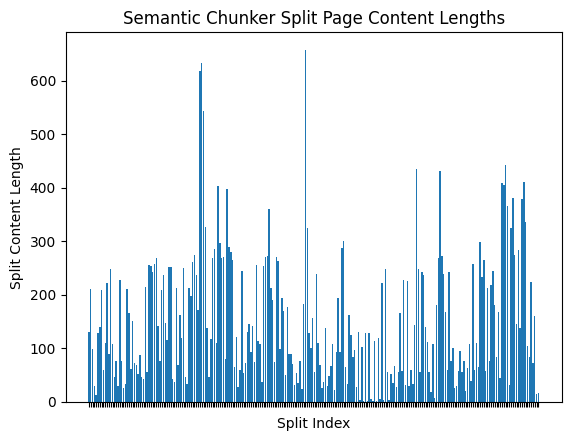

In [ ]:
import matplotlib.pyplot as plt

split_lengths = [num_of_tokens(split.page_content) for split in semantic_splits]

# Create a bar graph
plt.bar(range(len(split_lengths)), split_lengths)
plt.xlabel("Split Index")
plt.ylabel("Split Content Length")
plt.title("Semantic Chunker Split Page Content Lengths")
plt.xticks(range(len(split_lengths)), [])
plt.show()

### ChromaParallel Class: Parallel Document Embedding
The ChromaParallel class is an extension of the Chroma class to enable parallel processing of document embedding and storage using multiple worker processes.

ChromaParallel 클래스는 대량의 문서를 병렬로 임베딩하고 저장하는 데 최적화된 Chroma의 확장판입니다. 이를 사용하면 대규모 문서 처리 작업에서 속도와 효율성을 높일 수 있으며, from_documents 메서드를 통해 문서를 벡터화하여 검색에 유용한 벡터 데이터베이스를 생성할 수 있습니다.

Chroma is an AI-native open source vector database designed to enhance developer productivity and satisfaction. It is licensed under the Apache 2.0 license.

- <b> Generate Vectorspace </b> : The `from_documents` class method creates a vector store from a list of documents.

##### Reference

* [Chroma LangChain Documentation](https://python.langchain.com/v0.2/docs/integrations/vectorstores/chroma/)
* [Chroma Official Documentation](https://docs.trychroma.com/getting-started)

Chroma는 AI 관련 벡터 데이터를 효율적으로 저장하고 검색하는 오픈 소스 벡터 데이터베이스로, from_documents 메서드를 통해 간단하게 벡터 스토어를 생성할 수 있습니다. 이를 통해 질문 응답, 추천 시스템, 문서 검색 등 다양한 AI 응용 분야에서 활용될 수 있습니다.








In [ ]:
import asyncio


class ChromaParallel(Chroma):

    async def afrom_documents(documents, embedding, num_workers=2):
        db = Chroma(embedding_function=embedding)
        # create list of num_workers empty lists
        doc_groups = [[] for _ in range(num_workers)]

        for i in range(len(documents)):
            doc_groups[i % num_workers].append(documents[i])

        tasks = [db.aadd_documents(group) for group in doc_groups]
        await asyncio.gather(*tasks)
        return db

ChromaParallel 클래스의 afrom_documents 메서드는 비동기 병렬 처리를 통해 문서 임베딩을 동시에 처리하여 속도를 향상시킵니다. num_workers를 통해 작업자 수를 설정할 수 있어, 문서의 양이나 시스템 리소스에 맞춰 최적의 성능을 낼 수 있습니다.

In [ ]:
import asyncio
import time

now = time.time()

# 3. Embed & indexing
loop = asyncio.get_event_loop()
semantic_vectorstore = await ChromaParallel.afrom_documents(
    documents=semantic_splits,
    embedding=UpstageEmbeddings(model="solar-embedding-1-large"),
    num_workers=3,
)
semantic_retriever = semantic_vectorstore.as_retriever(search_kwargs={"k": 3})

# 4. retrive
result_docs = semantic_retriever.invoke("What is Bug Classification?")
print(result_docs[1])
print(f"Wall time: {time.time() - now:.2f} sec")

page_content='correct classifications of<br>the type (nb→b) over the total number of classificationsthat<br>resulted in a bug outcome. Put another way, if the change<br>classifier predicts that athat a change is buggy, what fraction of<br>these changes really contains a bug?</p><figure><img'
Wall time: 22.16 sec


이 코드는 3개의 작업자를 활용한 비동기 병렬 임베딩 및 검색 작업을 수행합니다. ChromaParallel 클래스와 afrom_documents 메서드를 통해 임베딩이 병렬로 수행되며, 검색 작업도 빠르게 수행되어 효율적인 RAG 파이프라인 구축에 도움이 됩니다. Wall time 출력은 전체 코드 실행에 걸린 시간을 나타내며, 병렬 처리를 통해 시간을 단축할 수 있음을 보여줍니다.

In [ ]:
# Finally query using RAG
query = "What is bug classification? How it works?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Bug classification is a process of categorizing software bugs based on their characteristics, such as the type of error, the component affected, the severity of the issue, or the root cause. This process helps developers and testers to prioritize and manage bugs more effectively.

Bug classification typically works by following these steps:

1. **Identification**: The first step is to identify the bug. This is usually done through testing or user reports.

2. **Reporting**: The bug is then reported, usually through a bug tracking system, where it is assigned a unique identifier.

3. **Analysis**: The bug is analyzed to determine its nature, severity, and impact on the software. This analysis may involve reproducing the bug, investigating its cause, and assessing how it affects the software's functionality.

4. **Categorization**: Based on the analysis, the bug is classified into a specific category. This categorization can be done using predefined categories or custom categories specif

이 코드에서는 RAG 파이프라인을 통해 최종 질문에 대해 맥락 기반의 답변을 생성합니다. 검색된 문서와 대화 히스토리를 기반으로 하여, 사용자 질문에 맞는 정확하고 연관성 있는 답변을 제공합니다.








In [ ]:
history = [HumanMessage(query), AIMessage(gc_result)]

query = "Why it is good?"
result_docs = semantic_retriever.invoke(query)

gc_result = chain.invoke({"history": history, "context": result_docs, "input": query})
print(gc_result)

Classifying bugs is beneficial for several reasons:

1. **Prioritization**: By categorizing bugs based on their severity, impact, and other factors, development teams can prioritize their work and focus on the most critical issues first. This helps to ensure that the most pressing problems are addressed promptly, improving the overall quality of the software.

2. **Efficiency**: Classifying bugs allows teams to manage their workload more effectively. They can assign bugs to specific team members based on their expertise or availability, streamlining the bug fixing process.

3. **Transparency**: A well-defined bug classification system provides transparency into the bug tracking process. This enables stakeholders, such as project managers, to understand the current state of the software and make informed decisions about resource allocation and project timelines.

4. **Improved Communication**: Clear bug classification categories facilitate better communication within the development tea

이 코드에서는 대화 히스토리를 유지하면서 새로운 질문에 대한 응답을 생성합니다. 검색된 문서와 이전 대화 내용을 기반으로 모델이 일관성 있고 연관성 있는 답변을 제공하여, 사용자와의 대화를 이어갈 수 있습니다.

### For an in-depth look at the different types of RAG, please refer to the files '09. Smart RAG' and '10. Tool_RAG'.

- [09. Smart RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/09_Smart_RAG.ipynb)
- [10. Tool_RAG.ipynb](https://github.com/UpstageAI/cookbook/blob/main/cookbooks/upstage/Solar-Full-Stack-LLM-101/10_tool_RAG.ipynb)

## [Session 5] Gradio

<b> Comprehensive RAG System for PDFs </b> : Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

Gradio와 **RAG(검색 보강 생성)**을 결합하여 PDF 문서를 실시간으로 처리하고 대화형 응답을 생성하는 시스템을 구축할 수 있습니다. Gradio는 사용자와의 인터랙티브 웹 인터페이스를 쉽게 만들어 주며, RAG는 질문에 맞는 정보를 PDF에서 추출하여 답변을 제공하는 데 사용됩니다.

주요 구성 요소
Gradio 인터페이스:

Gradio를 사용해 사용자가 PDF 파일을 업로드하고 질문을 입력할 수 있는 웹 인터페이스를 생성합니다.
실시간 대화형 응답을 제공하여 사용자 경험을 개선합니다.
RAG 시스템:

PDF에서 텍스트를 추출하고, 이를 임베딩하여 벡터 데이터베이스에 저장합니다.
사용자가 질문을 입력하면 관련 있는 정보를 데이터베이스에서 검색하고, 이를 기반으로 응답을 생성합니다.
구현 단계
PDF 문서 로드 및 텍스트 추출:

PyMuPDF 또는 pdfplumber와 같은 PDF 라이브러리를 사용해 PDF에서 텍스트를 추출합니다.
추출된 텍스트를 의미 단위로 나누고, 임베딩을 생성하여 벡터 데이터베이스에 저장합니다.
Gradio 웹 인터페이스 구축:

Gradio에서 PDF 업로드 및 질문 입력 필드를 만들고, 응답을 실시간으로 보여주는 UI를 구성합니다.
RAG 파이프라인 구축:

Chroma와 같은 벡터 데이터베이스를 사용해 문서에서 유사한 텍스트 청크를 검색하고, 검색된 정보로 응답을 생성합니다.
질문에 맞는 청크를 찾아 모델이 적절한 답변을 제공할 수 있도록 합니다.
코드 예시

In [ ]:
!pip install -qU gradio python-dotenv langchain-upstage python-dotenv

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [ ]:
import gradio as gr

from langchain_upstage import (
    ChatUpstage,
    UpstageEmbeddings,
    UpstageLayoutAnalysisLoader,
)
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage
from langchain_text_splitters import (
    Language,
    RecursiveCharacterTextSplitter,
)
from langchain_chroma import Chroma

llm = ChatUpstage(streaming=True)

이 코드는 Gradio와 LangChain, Upstage 및 Chroma를 결합하여 PDF 문서에서 질문에 대한 응답을 생성하는 대화형 RAG(검색 보강 생성) 시스템을 구축하는 설정을 하고 있습니다.

In [ ]:
# More general chat
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}"),
    ]
)

이 코드는 대화 히스토리를 반영하는 채팅 프롬프트를 생성하기 위한 설정입니다. ChatPromptTemplate.from_messages() 메서드를 통해 대화의 맥락을 유지하며 답변을 생성할 수 있도록 history를 포함한 프롬프트 템플릿을 만듭니다.

In [ ]:
chain = chat_with_history_prompt | llm | StrOutputParser()

In [ ]:
def chat(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    return chain.invoke({"message": message, "history": history_langchain_format})

이 함수는 대화의 연속성을 유지하면서 사용자 메시지에 응답하는 기능을 수행합니다. history를 LangChain의 형식에 맞게 변환하고, 새로운 message와 함께 전달하여, 문맥에 맞는 응답을 생성할 수 있습니다.

In [ ]:
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "How to eat healthy?",
            "Best Places in Korea",
            "How to make a chatbot?",
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot",
    )
    chatbot.chatbot.height = 300

이 코드는 Gradio와 LangChain 기반의 chat 함수를 활용하여 대화형 챗봇 인터페이스를 생성합니다. gr.Blocks() 내에서 gr.ChatInterface를 사용하여 Gradio의 대화형 인터페이스를 설정하며, Solar Chatbot이라는 이름으로 사용자와 상호작용할 수 있습니다.

In [ ]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


### Gradio_ChatPDF

- <b> Comprehensive RAG System for PDFs </b> : Use Gradio and RAG techniques to process PDF documents and generate real-time, interactive responses.

Comprehensive RAG System for PDFs는 Gradio와 RAG(검색 보강 생성) 기술을 결합하여, PDF 문서에서 실시간 대화형 응답을 생성하는 시스템입니다. 이 시스템은 PDF에서 텍스트를 추출하고, 질문에 따라 관련 정보를 검색하여 대화형으로 답변을 제공하도록 설계됩니다.

In [ ]:
def chat(message, history, retriever):
    result_docs = ""
    if retriever:
        result_docs = retriever.invoke(message)

    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    generator = chain.stream(
        {
            "context": result_docs,
            "message": message,
            "history": history_langchain_format,
        }
    )

    assistant = ""
    for gen in generator:
        assistant += gen
        yield assistant

이 함수는 Gradio와 LangChain을 사용하여 실시간으로 응답을 생성하는 대화형 챗봇 시스템입니다. PDF 문서에서 정보를 검색하여 질문에 대한 대답을 생성하며, 답변을 스트리밍 방식으로 실시간 출력합니다.

In [ ]:
def file_upload(file):
    layzer = UpstageLayoutAnalysisLoader(file, output_type="html", use_ocr=False)
    docs = layzer.load()
    splits = text_splitter.split_documents(docs)
    print(len(splits))
    vectorstore = Chroma.from_documents(
        documents=splits,
        embedding=UpstageEmbeddings(
            model="solar-embedding-1-large", embed_batch_size=100
        ),
    )
    retriever = vectorstore.as_retriever()

    return file, retriever

이 함수는 PDF 파일을 업로드하여 텍스트를 추출하고 분할한 뒤, 벡터 스토어에 저장하고 검색기를 생성합니다. RAG 시스템의 초기 설정 단계로, 업로드된 파일에서 관련 정보를 추출하고, 질문 응답을 위한 검색기를 반환하도록 설계되었습니다.

In [ ]:
with gr.Blocks() as demo:
    gr.Markdown("# Solar Chatbot")
    gr.Markdown(
        "Upstage Solar Chatbot",
    )
    with gr.Row():
        with gr.Column():
            file = gr.File()
            retreiver = gr.State()
        with gr.Column():
            chatbot = gr.ChatInterface(
                chat,
                examples=[
                    ["How to eat healthy?"],
                    ["Best Places in Korea"],
                    ["How to make a chatbot?"],
                ],
                additional_inputs=retreiver,
            )
    chatbot.chatbot.height = 300
    file.upload(file_upload, file, [file, retreiver])

이 코드는 Gradio를 사용하여 PDF 문서를 업로드하고 질문에 응답하는 Solar Chatbot 인터페이스를 만드는 설정입니다. 사용자가 PDF 파일을 업로드하면, 시스템이 파일을 처리하여 검색기를 생성하고, 사용자가 입력하는 질문에 대한 응답을 실시간으로 제공합니다.

In [ ]:
if __name__ == "__main__":
    demo.launch()

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.


## 🚀 Building Your Own AI-Powered Chatbot! 🤖


Congratulations on completing the course on building chatbots using Language Models (LLMs), Layout Analysis (LA), custom tools, and Groundedness Checks (GC)! Now, showcase your brilliant ideas by participating in a hackathon and leveraging the Solar API! 🚀

In [9]:
!pip install langchain_community
import gradio as gr
import pandas as pd
import re
from langchain.chat_models import ChatOpenAI  # 대체 LLM 모델
from langchain.embeddings import HuggingFaceEmbeddings  # 대체 임베딩 모델
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage



# 엑셀 파일에서 용어와 정의를 로드하는 함수
def load_terms_from_excel(file_path):
    df = pd.read_excel(file_path)
    print("Excel loaded data:", df.head())
    term_dict = dict(zip(df['term'], df['definition']))
    return term_dict

# 엑셀 파일에서 용어와 정의 로드
terms = load_terms_from_excel('/content/excel.xlsx')  # 엑셀 파일 경로 설정
print("Loaded terms dictionary:", terms)  # 로드된 용어 출력

# LLM 설정 (ChatOpenAI로 대체)
llm = ChatOpenAI(model="gpt-3.5-turbo", streaming=True)

# 대화 이력을 포함하는 프롬프트 템플릿 생성
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "당신은 유용한 어시스턴트입니다."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}")
    ]
)

# 검색 함수 정의
def retrieve_documents(query):
    # 입력된 쿼리에서 엑셀 파일의 용어와 정의를 검색
    results = {term: definition for term, definition in terms.items() if term.lower() in query.lower()}
    return results

# 프롬프트 템플릿과 LLM, 출력 파서를 연결하여 체인 생성
chain = chat_with_history_prompt | llm | StrOutputParser()

# 대화 함수 정의
def chat(message, history):
    # 엑셀 파일에서 용어 정의 검색
    retrieved_docs = retrieve_documents(message)

    # 엑셀 파일에서 정의가 검색된 경우 이를 반환
    if retrieved_docs:
        response = "인식된 용어와 정의:\n\n"
        for term, definition in retrieved_docs.items():
            response += f"{term}: {definition}\n\n"
        return response  # 엑셀 파일의 정의를 우선적으로 반환

    # 엑셀 파일의 정의가 없는 경우 LLM을 통해 답변 생성
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    # 체인을 호출하여 응답 생성
    return chain.invoke({"message": message, "history": history_langchain_format})

# Gradio 인터페이스 설정
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "Explain AI",
            "What is Machine Learning?",
            "Define Natural Language Processing"
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot"
    )
    chatbot.chatbot.height = 300

# 프로그램 시작 지점
if __name__ == "__main__":
    demo.launch()


ImportError: cannot import name 'StrOutputParser' from 'langchain.output_parsers' (/usr/local/lib/python3.10/dist-packages/langchain/output_parsers/__init__.py)

In [14]:


import gradio as gr
import pandas as pd
import re
from langchain.chat_models import ChatOpenAI  # 대체 LLM 모델
from langchain.embeddings import HuggingFaceEmbeddings  # 대체 임베딩 모델
from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain.schema import AIMessage, HumanMessage

# 엑셀 파일에서 용어와 정의를 로드하는 함수
def load_terms_from_excel(file_path):
    df = pd.read_excel(file_path)
    print("Excel loaded data:", df.head())
    term_dict = dict(zip(df['term'], df['definition']))
    return term_dict

# 엑셀 파일에서 용어와 정의 로드
terms = load_terms_from_excel('/content/excel.xlsx')  # 엑셀 파일 경로 설정
print("Loaded terms dictionary:", terms)  # 로드된 용어 출력

# LLM 설정 (ChatOpenAI로 대체)
llm = ChatOpenAI(model="gpt-3.5-turbo", streaming=True)

# 대화 이력을 포함하는 프롬프트 템플릿 생성
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "당신은 유용한 어시스턴트입니다."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}")
    ]
)

# 검색 함수 정의
def retrieve_documents(query):
    # 입력된 쿼리에서 엑셀 파일의 용어와 정의를 검색
    results = {term: definition for term, definition in terms.items() if term.lower() in query.lower()}
    return results

# 대화 함수 정의
def chat(message, history):
    # 엑셀 파일에서 용어 정의 검색
    retrieved_docs = retrieve_documents(message)

    # 엑셀 파일에서 정의가 검색된 경우 이를 반환
    if retrieved_docs:
        response = "인식된 용어와 정의:\n\n"
        for term, definition in retrieved_docs.items():
            response += f"{term}: {definition}\n\n"
        return response  # 엑셀 파일의 정의를 우선적으로 반환

    # 엑셀 파일의 정의가 없는 경우 LLM을 통해 답변 생성
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    # LLM 호출하여 응답 생성
    response = llm.generate({"message": message, "history": history_langchain_format})
    return response['choices'][0]['message']['content']

# Gradio 인터페이스 설정
with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "Explain AI",
            "What is Machine Learning?",
            "Define Natural Language Processing"
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot"
    )
    chatbot.chatbot.height = 300

# 프로그램 시작 지점
if __name__ == "__main__":
    demo.launch()


Excel loaded data:   term definition
0   사과  빨갛고 둥근 과일
1  바나나   노랗고 긴 과일
2   포도    보라색의 과일
3    배  노랗고 둥근 과일
Loaded terms dictionary: {'사과': '빨갛고 둥근 과일', '바나나': '노랗고 긴 과일', '포도': '보라색의 과일', '배': '노랗고 둥근 과일'}


/usr/local/lib/python3.10/dist-packages/gradio/components/chatbot.py:229: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  warnings.warn(


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7081f117a6e930fe28.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
